### Cleaning and Studying Data

In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import numpy as np
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_m_unorg = pd.read_csv('C:\\Users\\farad\\onedrive\\desktop\\MA_Exer_PikesPeak_Males.csv')
df_f_unorg = pd.read_csv('C:\\Users\\farad\\onedrive\\desktop\\MA_Exer_PikesPeak_Females.csv')
df_m = pd.DataFrame(data=df_m_unorg)
df_f = pd.DataFrame(data=df_f_unorg)

In [3]:
isinstance(df_m.Place, pd.DataFrame)

False

In [4]:
# Removing missing values
df_m.dropna(axis=0, inplace = True)
df_f.dropna(axis=0, inplace=True)

In [5]:
# Investigating on Age values. We have negative values for Age in males
df_m.Ag.value_counts().sort_index().head()

-1.0     2
 9.0     1
 10.0    1
 11.0    1
 12.0    6
Name: Ag, dtype: int64

In [6]:
# And the same in females
df_f.Ag.value_counts().sort_index().head()

-1.0     2
 1.0     1
 10.0    2
 11.0    1
 12.0    2
Name: Ag, dtype: int64

In [7]:
df_m =df_m[df_m['Ag']>0]
df_f =df_f[df_f['Ag']>0]

In [8]:
# All good now
df_m.Ag.min(),df_m.Ag.max()

(9.0, 84.0)

In [9]:
# All good now
df_f.Ag.min(),df_f.Ag.max()

(1.0, 74.0)

In [10]:
# Seperating Division
def define_age_range(x):
    if x < 15:
        return '14 or less'
    elif x < 20:
        return '15-19'
    elif x < 30:
        return '20-29'
    elif x < 40:
        return '30-39'
    elif x < 50:
        return '40-49'
    elif x < 60:
        return '50-59'
    elif x < 70:
        return '60-69'
    elif x < 80 :
        return '70-79'
    else:
        return 'over 80'
    
#apply to datasets 
df_m['Division'] = df_m['Ag'].apply(define_age_range)
df_f['Division'] = df_f['Ag'].apply(define_age_range)

In [11]:
#df_f.head()

In [12]:
df_m[['Div','Tot']] = df_m['Div/Tot'].str.split("/",expand=True) 
df_f[['Div','Tot']] = df_f['Div/Tot'].str.split("/",expand=True) 

In [13]:
#df_m['Gun Tim'] = df_m['Gun Tim'].map(lambda x: x.lstrip('D ').rstrip('#*'))
#df_m['Net Tim'] = df_m['Net Tim'].map(lambda x: x.rstrip('#*'))

In [14]:
def add_zero_to_first(X):
    if X.startswith(("2","3","4","5")):
        return "0:"+X
    else: 
        return X

df_f['Gun Tim1'] = df_f['Gun Tim'].map(add_zero_to_first)
df_f['Net Tim1']=df_f['Net Tim'].map(add_zero_to_first)
#df_f.sample(10)

In [15]:
df_m['Gun Tim1'] = df_m['Gun Tim'].map(add_zero_to_first)
df_m['Net Tim1']=df_m['Net Tim'].map(add_zero_to_first)
#df_m.sample(5)

In [16]:
df_f['Net_Time1'] =pd.to_datetime(df_f['Net Tim1'],format='%H:%M:%S')
df_f['Gun_Time1'] =pd.to_datetime(df_f['Gun Tim1'],format='%H:%M:%S')

df_m['Net_Time1'] =pd.to_datetime(df_m['Net Tim1'],format='%H:%M:%S')
df_m['Gun_Time1'] =pd.to_datetime(df_m['Gun Tim1'],format='%H:%M:%S')

In [17]:
# Calculate the time difference between gun time and net time
df_f['Gun_Net_Diff'] =df_f['Gun_Time1']- df_f['Net_Time1'] 
#df_f.sample(5)

In [18]:
df_m['Gun_Net_Diff'] =df_m['Gun_Time1']- df_m['Net_Time1'] 
#df_m.sample(5)

In [19]:
df_f.columns

Index(['Place', 'Div/Tot', 'Num', 'Name', 'Ag', 'Hometown', 'Gun Tim',
       'Net Tim', 'Pace', 'Division', 'Div', 'Tot', 'Gun Tim1', 'Net Tim1',
       'Net_Time1', 'Gun_Time1', 'Gun_Net_Diff'],
      dtype='object')

In [20]:
#rename the columns 
df_f.rename(columns={'Num':'Number','Ag':'Age','Gun Tim1':'Gun_Time',
                     'Net Tim1':'Net_Time','Tot':'Total_Racers'},
            inplace=True)
df_m.rename(columns={'Num':'Number','Ag':'Age','Gun Tim1':'Gun_Time',
                     'Net Tim1':'Net_Time','Tot':'Total_Racers'},
            inplace=True)

In [21]:
# Assign columns to correct data types
to_o =['Place','Div','Number']
to_num=['Total_Racers','Pace']
df_f[to_o]= df_f[to_o].astype(str)
df_m[to_o]= df_m[to_o].astype(str)


df_f['Total_Racers']= df_f['Total_Racers'].astype(int)
df_m['Total_Racers']= df_m['Total_Racers'].astype(int)



df_f['Pace']= df_f['Pace'].str.replace(":",'.')
df_f['Pace']= df_f['Pace'].astype(float)

df_m['Pace']= df_m['Pace'].str.replace(":",'.')
df_m['Pace']= df_m['Pace'].astype(float)

In [22]:
#create an unique marker for each gender when dataframes are combined
df_m['Gender'] = 'male'
df_f['Gender'] = 'female'

In [23]:
# create a combined dataframe for future use
df_total = pd.concat([df_m, df_f])
#df_total.sample(10)

In [24]:
df_total.columns

Index(['Place', 'Div/Tot', 'Number', 'Name', 'Age', 'Hometown', 'Gun Tim',
       'Net Tim', 'Pace', 'Division', 'Div', 'Total_Racers', 'Gun_Time',
       'Net_Time', 'Net_Time1', 'Gun_Time1', 'Gun_Net_Diff', 'Gender'],
      dtype='object')

In [25]:
df_time = df_total[['Place','Number','Name','Age','Hometown','Pace','Net_Time1', 'Gun_Time1',
       'Gun_Net_Diff', 'Division','Gender']]

In [26]:
# Calculate time elapsed in minutes
df_time['g_total_time'] = round(((df_time['Gun_Time1'].dt.hour*60)+df_time['Gun_Time1'].dt.minute+(df_time['Gun_Time1'].dt.second/60)),2)
df_time['n_total_time'] = round(((df_time['Net_Time1'].dt.hour*60)+df_time['Net_Time1'].dt.minute+(df_time['Net_Time1'].dt.second/60)),2)

### Q.1) Mean, Median, Mode and Range by Gender

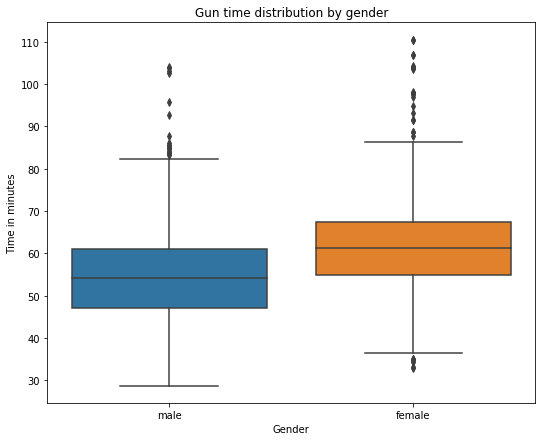

In [27]:
# Mode, range and IQR visualization of Guntime
plt.rcParams['figure.figsize'] = (8.75, 7.0)
plot1 = sns.boxplot(data=df_time, x='Gender', y='g_total_time')
plt.title("Gun time distribution by gender")
plt.xlabel('Gender')
plt.ylabel('Time in minutes')
plt.xticks(rotation=0)
plt.show()

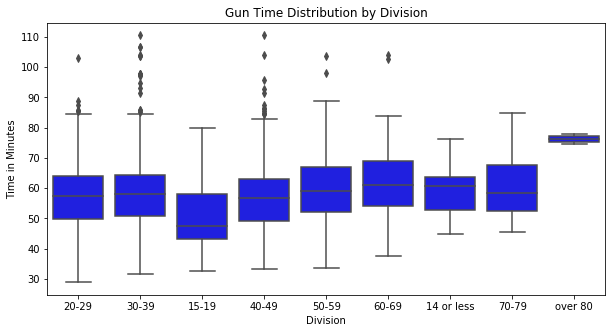

In [28]:
# Gun Time Distribution by Division
plt.subplots(figsize=(10, 5))
plot1 = sns.boxplot(data=df_time, x='Division', y='g_total_time', color = 'b')
plt.xlabel('Division')
plt.ylabel('Time in Minutes')
plt.title("Gun Time Distribution by Division")
plt.xticks(rotation=0)
plt.show()

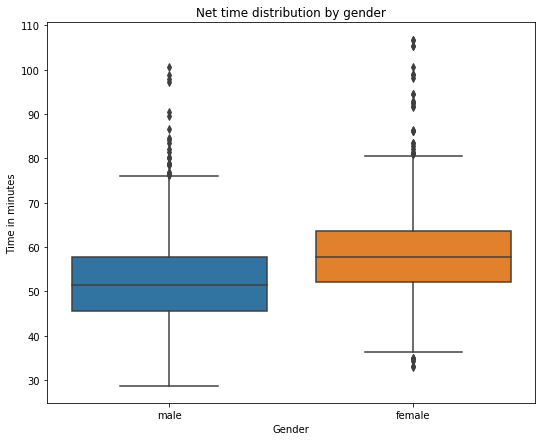

In [29]:
# Mode, range and IQR visualization of Nettime
plt.rcParams['figure.figsize'] = (8.75, 7.0)
plot1 = sns.boxplot(data=df_time, x='Gender', y='n_total_time')
plt.title("Net time distribution by gender")
plt.xlabel('Gender')
plt.ylabel('Time in minutes')
plt.xticks(rotation=0)
plt.show()

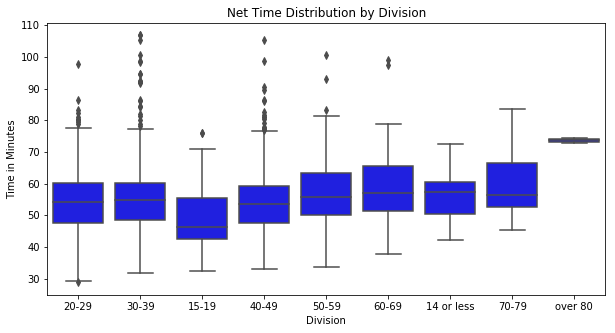

In [30]:
# Net Time Distribution by Division
plt.subplots(figsize=(10, 5))
plot1 = sns.boxplot(data=df_time, x='Division', y='n_total_time', color = 'b')
plt.xlabel('Division')
plt.ylabel('Time in Minutes')
plt.title("Net Time Distribution by Division")
plt.xticks(rotation=0)
plt.show()

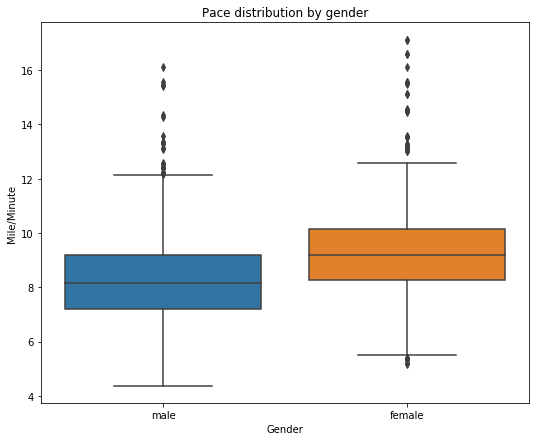

In [31]:
# Mode, range and IQR visualization of Pace
plt.rcParams['figure.figsize'] = (8.75, 7.0)
plot1 = sns.boxplot(data=df_time, x='Gender', y='Pace')
plt.title("Pace distribution by gender")
plt.xlabel('Gender')
plt.ylabel('Mile/Minute')
plt.xticks(rotation=0)
plt.show()

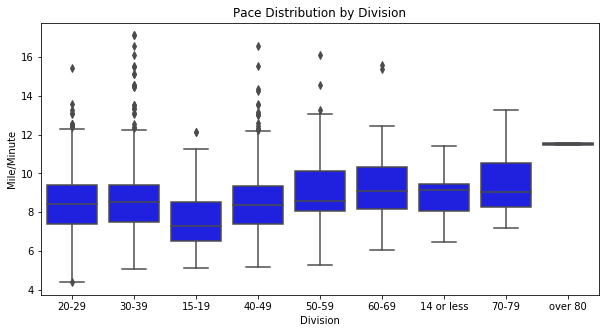

In [32]:
# Pace Distribution by Division
plt.subplots(figsize=(10, 5))
plot1 = sns.boxplot(data=df_time, x='Division', y='Pace', color = 'b')
plt.xlabel('Division')
plt.ylabel('Mile/Minute')
plt.title("Pace Distribution by Division")
plt.xticks(rotation=0)
plt.show()

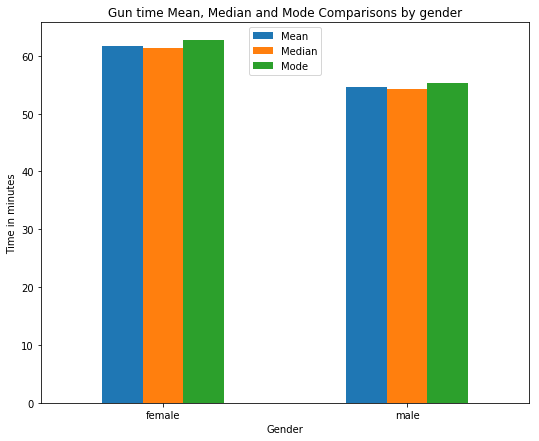

In [33]:
# statistical distribution of mean, median and mode for Gun time
plot1= df_time.groupby('Gender')['g_total_time'].agg([np.mean,np.median,lambda x:x.value_counts().index[0]]).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
L=plt.legend(loc = 'upper center')
L.get_texts()[0].set_text('Mean')
L.get_texts()[1].set_text('Median')
L.get_texts()[2].set_text('Mode')
plt.title("Gun time Mean, Median and Mode Comparisons by gender")
plt.xlabel('Gender')
plt.ylabel('Time in minutes')
plt.xticks(rotation=0)
plt.show()

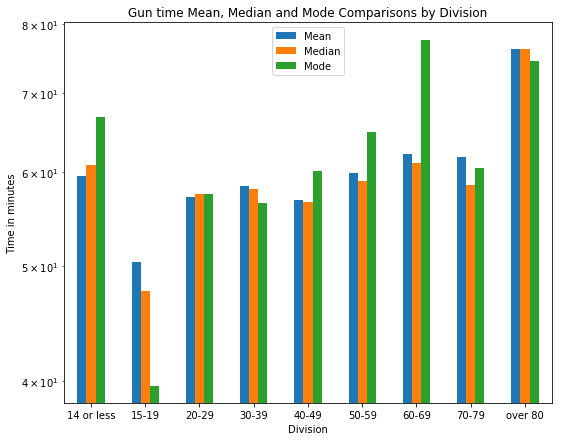

In [34]:
# statistical distribution of mean, median and mode for Gun time
df_time.groupby('Division')['g_total_time'].agg([np.mean,np.median,lambda x:x.value_counts().index[0]]).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
L=plt.legend(loc = 'upper center')
L.get_texts()[0].set_text('Mean')
L.get_texts()[1].set_text('Median')
L.get_texts()[2].set_text('Mode')
plt.title("Gun time Mean, Median and Mode Comparisons by Division")
plt.xlabel('Division')
plt.ylabel('Time in minutes')
plt.xticks(rotation=0)
plt.yscale('log')
plt.show()

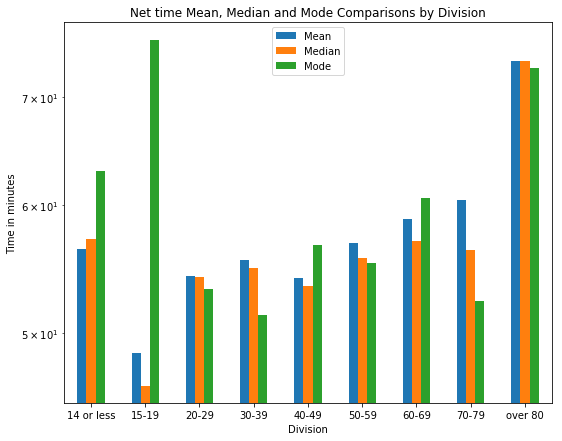

In [35]:
# statistical distribution of mean, median and mode for Net time
df_time.groupby('Division')['n_total_time'].agg([np.mean,np.median,lambda x:x.value_counts().index[0]]).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
L=plt.legend(loc = 'upper center')
L.get_texts()[0].set_text('Mean')
L.get_texts()[1].set_text('Median')
L.get_texts()[2].set_text('Mode')
plt.title("Net time Mean, Median and Mode Comparisons by Division")
plt.xlabel('Division')
plt.ylabel('Time in minutes')
plt.xticks(rotation=0)
plt.yscale('log')
plt.show()

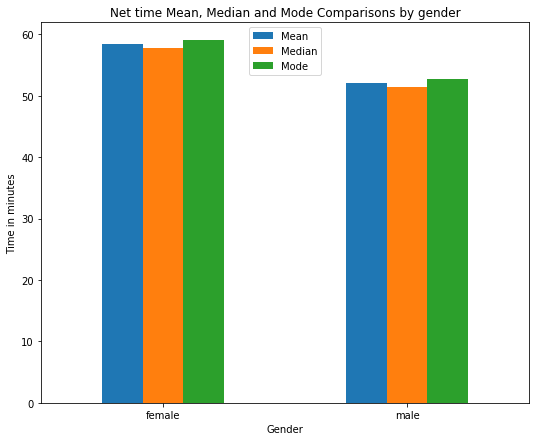

In [36]:
# statistical distribution of mean, median and mode for Net Time
plot1= df_time.groupby('Gender')['n_total_time'].agg([np.mean,np.median,lambda x:x.value_counts().index[0]]).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
L=plt.legend(loc = 'upper center')
L.get_texts()[0].set_text('Mean')
L.get_texts()[1].set_text('Median')
L.get_texts()[2].set_text('Mode')
plt.title("Net time Mean, Median and Mode Comparisons by gender")
plt.xlabel('Gender')
plt.ylabel('Time in minutes')
plt.xticks(rotation=0)
plt.show()

In [37]:
# Gun Time and Net Time Calculations
gam = round(df_time[df_time['Gender'] =='male']['g_total_time'].quantile(.25),2)
gbm = round(df_time[df_time['Gender'] =='male']['g_total_time'].quantile(.75),2)
gcm = round(df_time[df_time['Gender'] =='male']['g_total_time'].quantile(.5),2)
gdm = df_time[df_time['Gender'] =='male']['g_total_time'].value_counts(ascending=False).head(2)
gem = round(df_time[df_time['Gender'] =='male']['g_total_time'].min(),2)
gfm = round(df_time[df_time['Gender'] =='male']['g_total_time'].max(),2)
ghm = round(df_time[df_time['Gender'] =='male']['g_total_time'].mean(),2)
print('Gun Time Stats for Males:')
print('min: ' + str(gem))
print("25 percentile: " + str(gam))
print('Median: ' + str(gcm))
print('75 percentile: ' + str(gbm))
print('max: ' + str(gfm))
print('mean: ' + str(ghm))
print('Mode: ') 
print(str(gdm))
print('-----------------------------------')
gaf = round(df_time[df_time['Gender'] =='female']['g_total_time'].quantile(.25),2)
gbf = round(df_time[df_time['Gender'] =='female']['g_total_time'].quantile(.75),2)
gcf = round(df_time[df_time['Gender'] =='female']['g_total_time'].quantile(.5),2)
gdf = df_time[df_time['Gender'] =='female']['g_total_time'].value_counts(ascending=False).head(2)
gef = round(df_time[df_time['Gender'] =='female']['g_total_time'].min(),2)
gff = round(df_time[df_time['Gender'] =='female']['g_total_time'].max(),2)
ghf = round(df_time[df_time['Gender'] =='female']['g_total_time'].mean(),2)
print('Gun Time Stats for Females:')
print('min: ' + str(gef))
print("25 percentile: " + str(gaf))
print('Median: ' + str(gcf))
print('75 percentile: ' + str(gbf))
print('max: ' + str(gff))
print('mean: ' + str(ghf))
print('Mode: ') 
print(str(gdf))
print('-----------------------------------')
nam = round(df_time[df_time['Gender'] =='male']['n_total_time'].quantile(.25),2)
nbm = round(df_time[df_time['Gender'] =='male']['n_total_time'].quantile(.75),2)
ncm = round(df_time[df_time['Gender'] =='male']['n_total_time'].quantile(.5),2)
ndm = df_time[df_time['Gender'] =='male']['n_total_time'].value_counts(ascending=False).head(10)
nem = round(df_time[df_time['Gender'] =='male']['n_total_time'].min(),2)
nfm = round(df_time[df_time['Gender'] =='male']['n_total_time'].max(),2)
nhm = round(df_time[df_time['Gender'] =='male']['n_total_time'].mean(),2)
print('Net Time Stats for Males:')
print('min: ' + str(nem))
print("25 percentile: " + str(nam))
print('Median: ' + str(ncm))
print('75 percentile: ' + str(nbm))
print('max: ' + str(nfm))
print('mean: ' + str(nhm))
print('Mode: ') 
print(str(ndm))
print('-----------------------------------')
naf = round(df_time[df_time['Gender'] =='female']['n_total_time'].quantile(.25),2)
nbf = round(df_time[df_time['Gender'] =='female']['n_total_time'].quantile(.75),2)
ncf = round(df_time[df_time['Gender'] =='female']['n_total_time'].quantile(.5),2)
ndf = df_time[df_time['Gender'] =='female']['n_total_time'].value_counts(ascending=False).head(2)
nef = round(df_time[df_time['Gender'] =='female']['n_total_time'].min(),2)
nff = round(df_time[df_time['Gender'] =='female']['n_total_time'].max(),2)
nhf = round(df_time[df_time['Gender'] =='female']['n_total_time'].mean(),2)
print('Net Time Stats for Females:')
print('min: ' + str(nef))
print("25 percentile: " + str(naf))
print('Median: ' + str(ncf))
print('75 percentile: ' + str(nbf))
print('max: ' + str(nff))
print('mean: ' + str(nhf))
print('Mode: ') 
print(str(ndf))

Gun Time Stats for Males:
min: 28.8
25 percentile: 47.0
Median: 54.3
75 percentile: 61.12
max: 104.12
mean: 54.62
Mode: 
55.22    5
64.93    5
Name: g_total_time, dtype: int64
-----------------------------------
Gun Time Stats for Females:
min: 32.98
25 percentile: 54.92
Median: 61.33
75 percentile: 67.53
max: 110.52
mean: 61.7
Mode: 
62.67    5
61.78    5
Name: g_total_time, dtype: int64
-----------------------------------
Net Time Stats for Males:
min: 28.78
25 percentile: 45.68
Median: 51.37
75 percentile: 57.82
max: 100.63
mean: 52.12
Mode: 
52.70    4
49.80    4
54.40    4
35.47    4
51.33    4
47.38    4
52.10    4
49.97    4
56.72    4
47.08    4
Name: n_total_time, dtype: int64
-----------------------------------
Net Time Stats for Females:
min: 32.97
25 percentile: 52.22
Median: 57.82
75 percentile: 63.6
max: 106.82
mean: 58.45
Mode: 
59.00    5
51.58    5
Name: n_total_time, dtype: int64


##### The remaining of calculations (Stats based on Division and Gender) are at the end.

### Q.2) Analyzing Gun Time and Net Time Difference

In [38]:
# Feature selection and converting time to seconds
df_diff =df_time[['Place', 'Number','Age', 'Name','Gun_Net_Diff','Gender','g_total_time','n_total_time','Division','Pace']]
df_diff['diff_sec']=df_diff.Gun_Net_Diff/ np.timedelta64(1, 's')

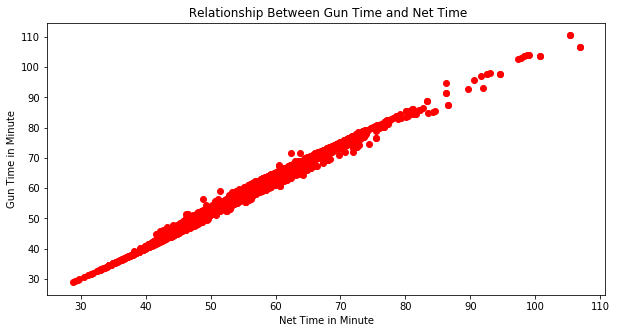

In [39]:
#Relationship between Gun Time and Net Time
plt.figure(figsize=(10, 5))
plt.scatter(df_diff['n_total_time'],df_diff['g_total_time'], c='r')
plt.xlabel('Net Time in Minute')
plt.ylabel('Gun Time in Minute')
plt.title(" Relationship Between Gun Time and Net Time")
plt.show()

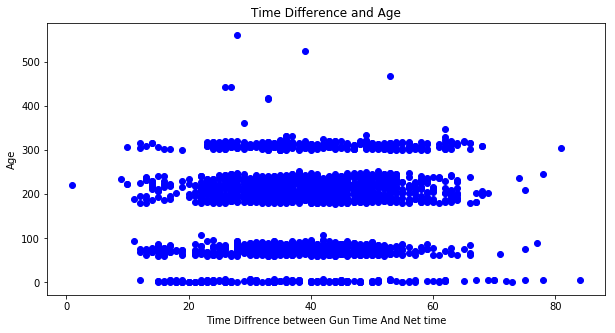

In [40]:
# Time Difference with Division
plt.figure(figsize=(10, 5))
plt.scatter(df_diff['Age'],df_diff['diff_sec'], c='b')
plt.xlabel('Time Diffrence between Gun Time And Net time')
plt.ylabel('Age')
plt.title("Time Difference and Age")
plt.show()

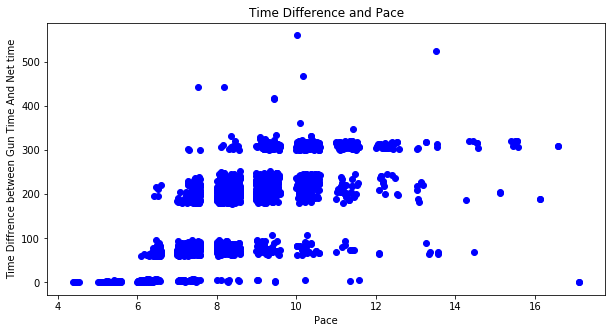

In [41]:
# Time Difference and Pace
plt.figure(figsize=(10, 5))
plt.scatter(df_diff['Pace'],df_diff['diff_sec'], c='b')
plt.xlabel('Pace')
plt.ylabel('Time Diffrence between Gun Time And Net time')
plt.title('Time Difference and Pace')
plt.show()

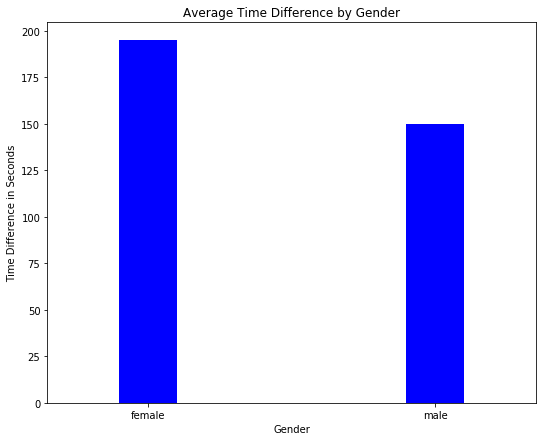

In [42]:
# Average Time Difference by gender
barlist= df_diff.groupby('Gender')['diff_sec'].mean().plot(kind='bar', color='blue', width=0.2)
plt.xlabel('Gender')
plt.ylabel('Time Difference in Seconds')
plt.title("Average Time Difference by Gender")
plt.xticks(rotation=0)
plt.show()


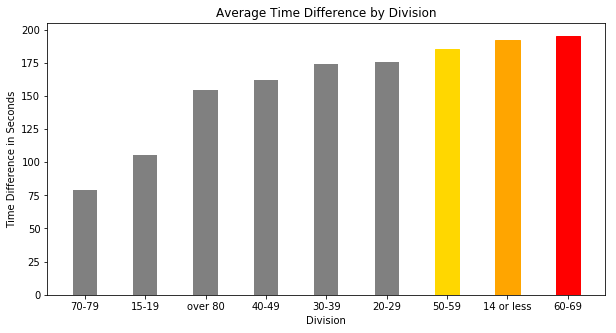

In [43]:
# Time Difference by Division
plt.subplots(figsize=(10,5))
division_time = df_diff.groupby('Division')['diff_sec'].mean().sort_values()
barlist = plt.bar(division_time.index,division_time, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Time Difference in Seconds')
plt.title("Average Time Difference by Division")
barlist[8].set_color('r')
barlist[7].set_color('orange')
barlist[6].set_color('gold')
plt.xticks(rotation=0)
plt.show()

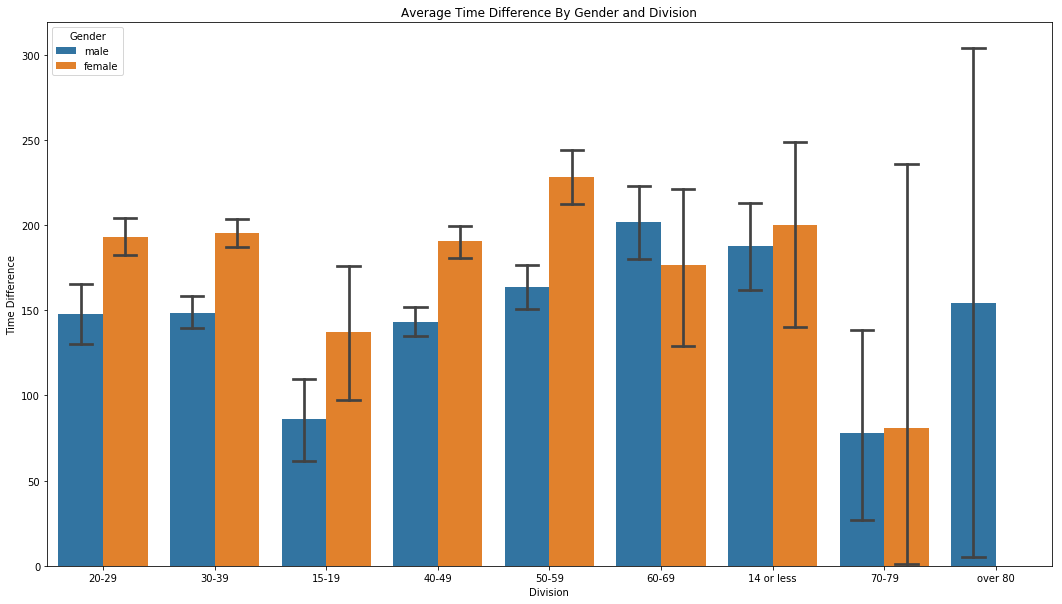

In [44]:
# Time Difference by Division and Gender
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x='Division', y='diff_sec',hue = 'Gender', data=df_diff, capsize=.2)
plt.xlabel('Division')
plt.ylabel('Time Difference')
plt.title('Average Time Difference By Gender and Division')
plt.show()

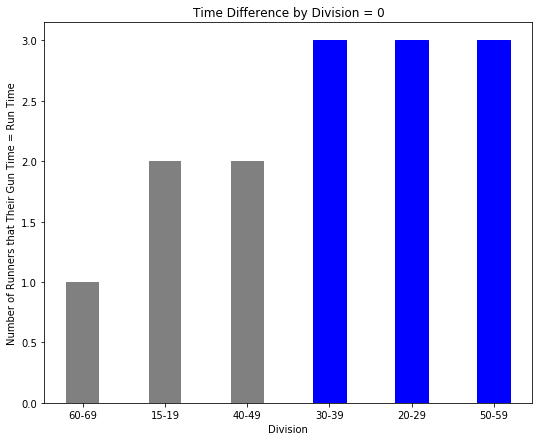

In [45]:
# plotting the runers that acted fast
quick_runner = df_diff[df_diff['diff_sec'] ==0]['Division'].value_counts().sort_values()
barlist = plt.bar(quick_runner.index,quick_runner, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Number of Runners that Their Gun Time = Run Time')
plt.title("Time Difference by Division = 0")
barlist[5].set_color('b')
barlist[4].set_color('b')
barlist[3].set_color('b')
plt.xticks(rotation=0)
plt.show()

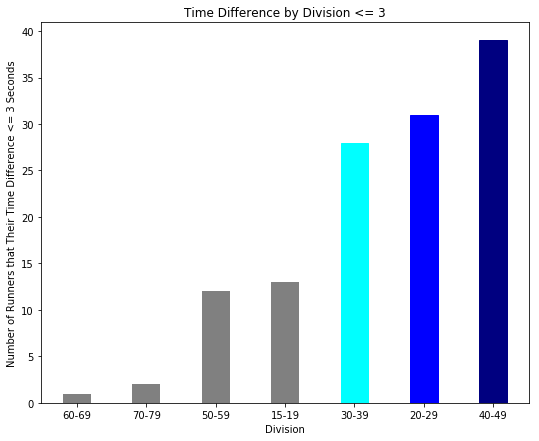

In [46]:
# plotting the runers that acted almost fast
quick_runner = df_diff[df_diff['diff_sec'] <= 3]['Division'].value_counts().sort_values()
barlist = plt.bar(quick_runner.index,quick_runner, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Number of Runners that Their Time Difference <= 3 Seconds')
plt.title("Time Difference by Division <= 3")
barlist[6].set_color('navy')
barlist[5].set_color('blue')
barlist[4].set_color('cyan')
plt.xticks(rotation=0)
plt.show()

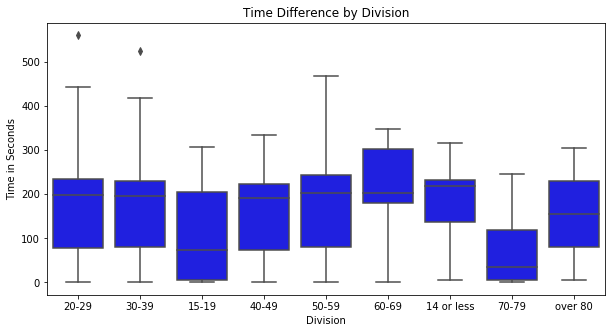

In [47]:
# Time Difference Distribution by Division
plt.subplots(figsize=(10, 5))
plot1 = sns.boxplot(data=df_diff, x='Division', y='diff_sec', color = 'b')
plt.xlabel('Division')
plt.ylabel('Time in Seconds')
plt.title("Time Difference by Division")
plt.xticks(rotation=0)
plt.show()

### Q.3) Chris Deo and 10 Percentile of Runners

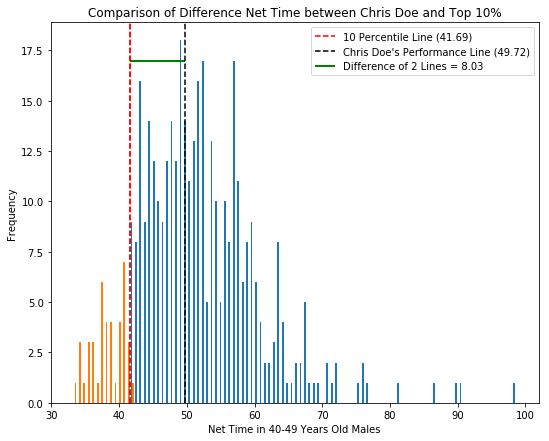

In [48]:
a = df_diff[(df_diff['Division']=="40-49") &(df_diff['Gender']=="male")]['n_total_time'] 
a = a.tolist()
top10_percent_list = []
for i in a:
    if i < 41.69:
        top10_percent_list.append(i)

l3 = [x for x in a if x not in top10_percent_list]
plt.hist((l3, top10_percent_list), bins = 100)
plt.axvline(x=41.69, color = 'r', linestyle='--')
xcoords = [41.69, 49.72]
# colors for the lines
colors = ['r','k']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linestyle='--')
plt.hlines(y=17, xmin=41.69, xmax=49.72, linewidth=2, color='g', label='Difference of 2 Lines = 8.03')
L=plt.legend()
L.get_texts()[0].set_text('10 Percentile Line (41.69)')
L.get_texts()[1].set_text('Chris Doe\'s Performance Line (49.72)')
plt.xlabel('Net Time in 40-49 Years Old Males')
plt.ylabel('Frequency')
plt.title('Comparison of Difference Net Time between Chris Doe and Top 10%')
plt.show()


In [49]:
print('Top 10% Net: ' + str(df_diff[(df_diff['Division']=="40-49") &(df_diff['Gender']=="male")]['n_total_time'].quantile(0.1)))
print('Chris Doe Net: ' + str(df_diff[df_diff.Name == 'Chris Doe']['n_total_time']))

Top 10% Net: 41.69
Chris Doe Net: 534    49.72
Name: n_total_time, dtype: float64


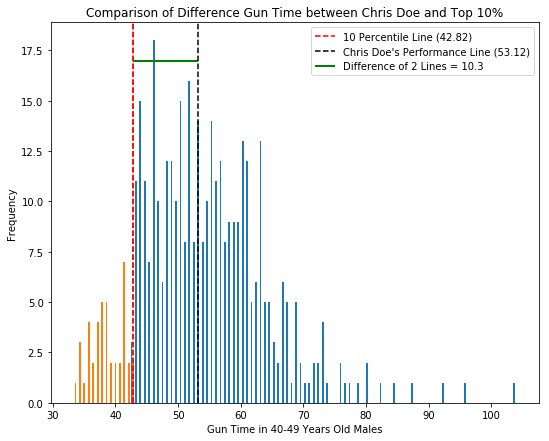

In [50]:
b = df_diff[(df_diff['Division']=="40-49") &(df_diff['Gender']=="male")]['g_total_time'] 
b = b.tolist()
top10_percent_list = []
for i in b:
    if i < 42.82:
        top10_percent_list.append(i)

l4 = [x for x in b if x not in top10_percent_list]
plt.hist((l4, top10_percent_list), bins = 100)

plt.axvline(x=42.82, color = 'r', linestyle='--')
xcoords = [42.82, 53.12]
# colors for the lines
colors = ['r','k']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linestyle='--')
plt.hlines(y=17, xmin=42.82, xmax=53.12, linewidth=2, color='g', label='Difference of 2 Lines = 10.3')

L=plt.legend()
L.get_texts()[0].set_text('10 Percentile Line (42.82)')
L.get_texts()[1].set_text('Chris Doe\'s Performance Line (53.12)')

plt.xlabel('Gun Time in 40-49 Years Old Males')
plt.ylabel('Frequency')
plt.title('Comparison of Difference Gun Time between Chris Doe and Top 10%')
plt.show()


In [51]:
print('Top 10% Gun: ' + str(df_diff[(df_diff['Division']=="40-49") &(df_diff['Gender']=="male")]['g_total_time'].quantile(0.1)))
print('Chris Doe Gun: ' + str(df_diff[df_diff.Name == 'Chris Doe']['g_total_time']))

Top 10% Gun: 42.82
Chris Doe Gun: 534    53.12
Name: g_total_time, dtype: float64


### Q.4) Race Results for each Division

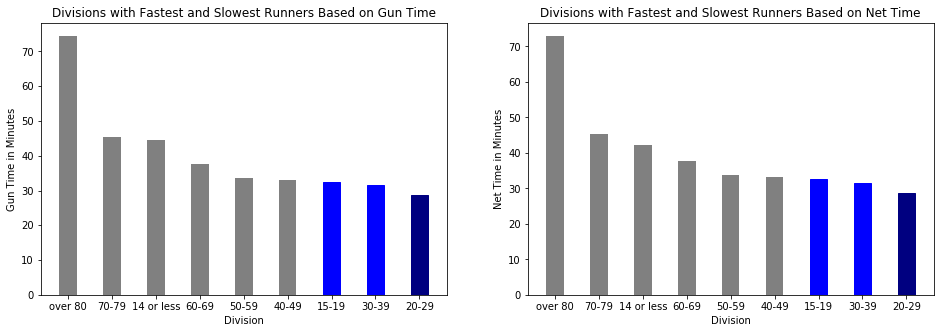

In [52]:
# Plotting the Fastest Runners by Division
plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)
quick_runner_group = df_diff.groupby('Division')['g_total_time'].min().sort_values(ascending=False)
barlist = plt.bar(quick_runner_group.index,quick_runner_group, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Gun Time in Minutes')
plt.title("Divisions with Fastest and Slowest Runners Based on Gun Time")
barlist[8].set_color('navy')
barlist[7].set_color('b')
barlist[6].set_color('b')
plt.xticks(rotation=0)
plt.subplot(1,2,2)
quick_runner_group = df_diff.groupby('Division')['n_total_time'].min().sort_values(ascending=False)
barlist = plt.bar(quick_runner_group.index,quick_runner_group, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Net Time in Minutes')
plt.title("Divisions with Fastest and Slowest Runners Based on Net Time")
barlist[8].set_color('navy')
barlist[7].set_color('b')
barlist[6].set_color('b')
plt.xticks(rotation=0)
plt.show()

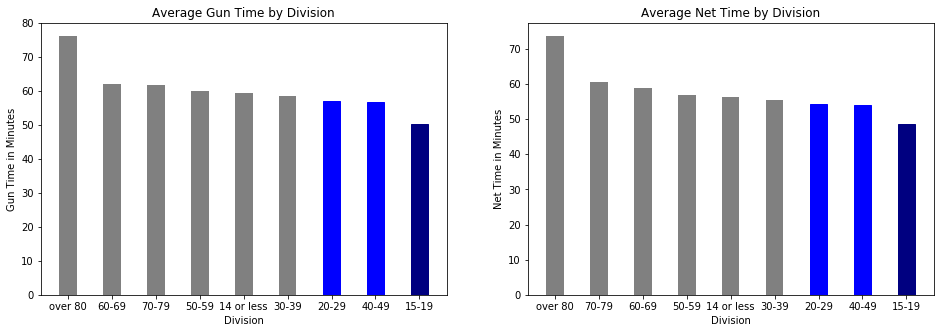

In [53]:
# Plotting the Average Gun Time by Division
plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)
Average_runner_group = df_diff.groupby('Division')['g_total_time'].mean().sort_values(ascending=False)
barlist = plt.bar(Average_runner_group.index,Average_runner_group, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Gun Time in Minutes')
plt.title("Average Gun Time by Division")
barlist[8].set_color('navy')
barlist[7].set_color('b')
barlist[6].set_color('b')
plt.xticks(rotation=0)
plt.subplot(1,2,2)
Average_runner_group = df_diff.groupby('Division')['n_total_time'].mean().sort_values(ascending=False)
barlist = plt.bar(Average_runner_group.index,Average_runner_group, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Net Time in Minutes')
plt.title("Average Net Time by Division")
barlist[8].set_color('navy')
barlist[7].set_color('b')
barlist[6].set_color('b')
plt.xticks(rotation=0)
plt.show()

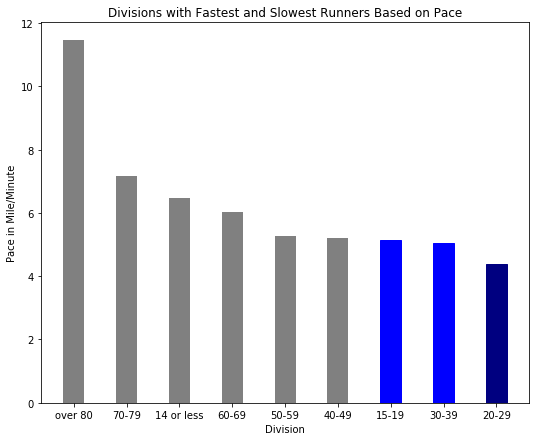

In [54]:
# Plotting the Fastest Runners by Division

quick_Pace_group = df_diff.groupby('Division')['Pace'].min().sort_values(ascending=False)
barlist = plt.bar(quick_Pace_group.index,quick_Pace_group, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Pace in Mile/Minute')
plt.title("Divisions with Fastest and Slowest Runners Based on Pace")
barlist[8].set_color('navy')
barlist[7].set_color('b')
barlist[6].set_color('b')
plt.xticks(rotation=0)
plt.show()

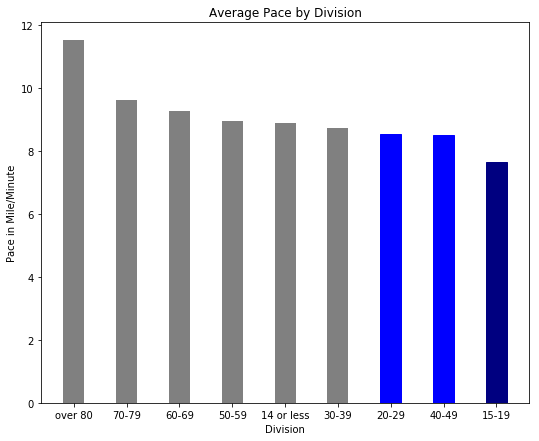

In [55]:
# Plotting the Average Pace by Division
quick_Avg_Pace_group = df_diff.groupby('Division')['Pace'].mean().sort_values(ascending=False)
barlist = plt.bar(quick_Avg_Pace_group.index,quick_Avg_Pace_group, data=df_diff,color='grey', width = 0.4)
plt.xlabel('Division')
plt.ylabel('Pace in Mile/Minute')
plt.title("Average Pace by Division")
barlist[8].set_color('navy')
barlist[7].set_color('b')
barlist[6].set_color('b')
plt.xticks(rotation=0)
plt.show()

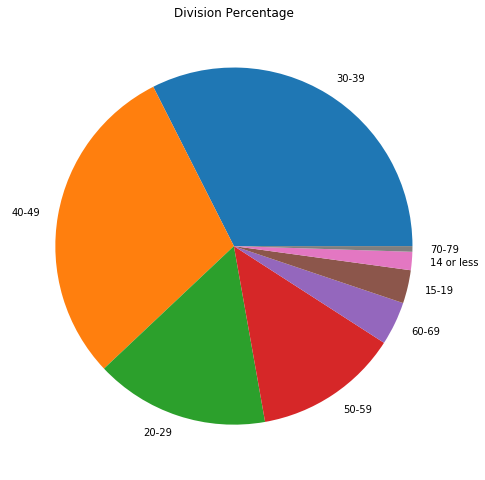

In [56]:
plt.subplots(figsize=(8,10))
df_diff2 = df_diff.drop(df_diff.index[df_diff['Division'] == 'over 80'])
x = df_diff2['Division'].value_counts()

plt.title('Division Percentage')
plt.pie(x,labels=x.index)

plt.show()

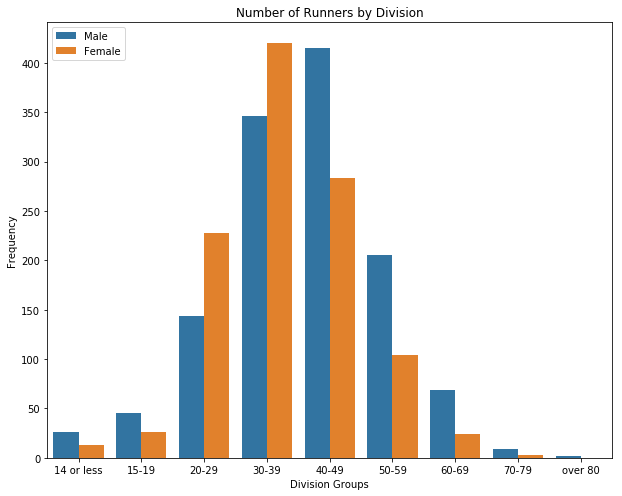

In [57]:

sns.countplot(x='Division',hue='Gender',order=['14 or less','15-19','20-29','30-39','40-49','50-59','60-69','70-79', 'over 80'], data=df_diff)
L=plt.legend()
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')
plt.xlabel('Division Groups')
plt.ylabel('Frequency')
plt.title('Number of Runners by Division')
plt.tight_layout()
plt.show()

### The Remaining Calculations in Q2

In [58]:
print('Gun Time for Males by Division: ')
print('min is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['g_total_time'].min(),2)))
print('25 percentile is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['g_total_time'].quantile(.25),2)))
print('median is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['g_total_time'].quantile(.5),2)))
print('75 percentile is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['g_total_time'].quantile(.75),2)))
print('max is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['g_total_time'].max(),2)))
print('mean is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['g_total_time'].mean(),2)))
print('Gun Time for Females by Division: ')
print('min is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['g_total_time'].min(),2)))
print('25 percentile is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['g_total_time'].quantile(.25),2)))
print('median is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['g_total_time'].quantile(.5),2)))
print('75 percentile is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['g_total_time'].quantile(.75),2)))
print('max is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['g_total_time'].max(),2)))
print('mean is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['g_total_time'].mean(),2)))
print('Net Time for Males by Division: ')
print('min is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['n_total_time'].min(),2)))
print('25 percentile is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['n_total_time'].quantile(.25),2)))
print('median is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['n_total_time'].quantile(.5),2)))
print('75 percentile is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['n_total_time'].quantile(.75),2)))
print('max is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['n_total_time'].max(),2)))
print('mean is: ' + str(round(df_time[df_time['Gender'] == 'male'].groupby('Division')['n_total_time'].mean(),2)))
print('Net Time for Females by Division: ')
print('min is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['n_total_time'].min(),2)))
print('25 percentile is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['n_total_time'].quantile(.25),2)))
print('median is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['n_total_time'].quantile(.5),2)))
print('75 percentile is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['n_total_time'].quantile(.75),2)))
print('max is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['n_total_time'].max(),2)))
print('mean is: ' + str(round(df_time[df_time['Gender'] == 'female'].groupby('Division')['n_total_time'].mean(),2)))

Gun Time for Males by Division: 
min is: Division
14 or less    44.67
15-19         32.50
20-29         28.80
30-39         31.67
40-49         33.12
50-59         33.70
60-69         37.65
70-79         45.35
over 80       74.47
Name: g_total_time, dtype: float64
25 percentile is: Division
14 or less    51.19
15-19         39.65
20-29         44.02
30-39         47.02
40-49         46.39
50-59         50.15
60-69         54.25
70-79         52.45
over 80       75.35
Name: g_total_time, dtype: float64
median is: Division
14 or less    56.77
15-19         47.10
20-29         51.84
30-39         54.32
40-49         53.17
50-59         56.05
60-69         60.10
70-79         57.32
over 80       76.24
Name: g_total_time, dtype: float64
75 percentile is: Division
14 or less    63.38
15-19         52.55
20-29         60.52
30-39         61.00
40-49         60.26
50-59         62.90
60-69         68.88
70-79         60.48
over 80       77.12
Name: g_total_time, dtype: float64
max is: Division

In [59]:
# Mode by Gender-Division
#
df_time[df_time['Division'] =='over 80'].groupby('Gender')['Pace'].value_counts(ascending=False)

Gender  Pace 
male    11.45    1
        11.59    1
Name: Pace, dtype: int64

In [60]:
round(df_time[df_time['Gender'] == 'female'].groupby('Division')['Pace'].mean(),2)

Division
14 or less     9.36
15-19          8.21
20-29          9.01
30-39          9.24
40-49          9.12
50-59          9.87
60-69          9.43
70-79         10.20
Name: Pace, dtype: float64

In [61]:
round(df_time[df_time['Gender'] == 'female'].groupby('Division')['Pace'].quantile(.5),2)

Division
14 or less     9.22
15-19          8.18
20-29          9.07
30-39          9.15
40-49          9.17
50-59          9.56
60-69          9.24
70-79         10.21
Name: Pace, dtype: float64